# Libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters


In [3]:
#libraries
import pandas as pd
import numpy as np

In [14]:
#get the data
data = pd.read_csv("airmiles.csv", index_col = "Date")
data.head()

,airmiles
Date,
1/1/1996,30983174
1/2/1996,32147663
1/3/1996,38342975
1/4/1996,35969113
1/5/1996,36474391


In [15]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)    

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663


#Preparation

In [17]:
data = data.asfreq("MS")
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

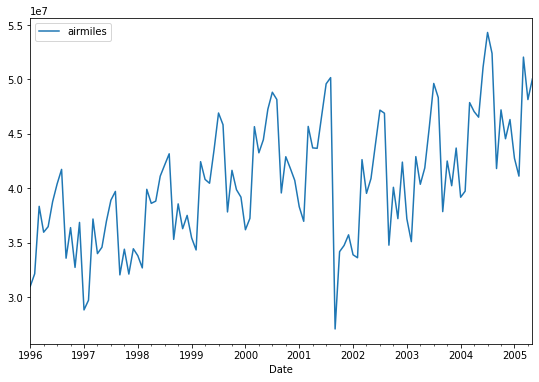

In [18]:
#Viz
data.plot(figsize = (9,6))

In [21]:
#training and test set
test_months = 12
training_set = data.iloc[:-test_months,:]
test_set = data.iloc[-test_months:,:]
test_set.head()

,airmiles
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665


#Holt Winters


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(training_set['airmiles'],
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [37]:
#predictions 
predictions = model.forecast(steps = 12).rename("HW")
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2004-06-01    4.991730e+07
2004-07-01    5.266735e+07
2004-08-01    5.203231e+07
2004-09-01    3.947657e+07
2004-10-01    4.519621e+07
2004-11-01    4.321495e+07
2004-12-01    4.611047e+07
2005-01-01    4.156333e+07
2005-02-01    4.102823e+07
2005-03-01    5.027817e+07
2005-04-01    4.786861e+07
2005-05-01    4.832798e+07
Freq: MS, Name: HW, dtype: float64

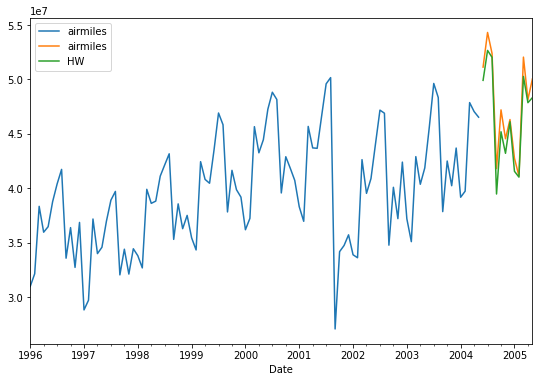

In [38]:
#plotting
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend = True)
predictions.plot(legend = True)

In [39]:
#MAE and MAPE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_error(test_set['airmiles'], predictions))
print(mean_absolute_percentage_error(test_set['airmiles'], predictions))

1182551.3801758632
0.024891515572009252
